# Analisi tecnica in python con la libreria ta

https://technical-analysis-library-in-python.readthedocs.io/en/latest/#

``` $ pip install ta```
    

In [5]:
import ta

In [2]:
print(3+7)

10


Importiamo dei dati :

In [10]:
import yfinance as yf
import pandas as pd
fca = yf.Ticker("SPM.MI")
df = fca.history( start="2020-01-01", end="2021-10-10")

In [11]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,4.354306,4.385167,4.340369,4.361275,4604923,0.0,0
2020-01-03,4.374216,4.442905,4.365257,4.399104,9470927,0.0,0
2020-01-06,4.432951,4.438924,4.343356,4.409059,7127358,0.0,0
2020-01-07,4.429964,4.465802,4.420009,4.430960,8387913,0.0,0
2020-01-08,4.429964,4.494671,4.412045,4.474761,11206376,0.0,0


In [ ]:
ta

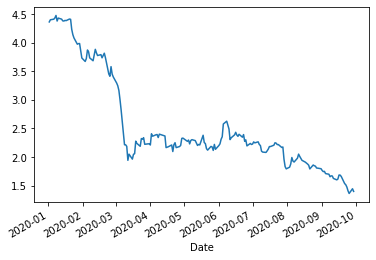

In [6]:
df['Close'].plot()

In [7]:

# Initialize Bollinger Bands Indicator
indicator_bb = ta.volatility.BollingerBands(close=df["Close"])

# Add Bollinger Bands features
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()

# Add Bollinger Band high indicator
df['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()

# Add Bollinger Band low indicator
df['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

In [8]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,bb_bbli
Date,,,,,,,,,,,,
2020-09-23,1.5160,1.5335,1.4735,1.4735,11763945,0.0,0,1.672850,1.855521,1.490179,0.0,1.0
2020-09-24,1.4500,1.4540,1.3780,1.4085,21075044,0.0,0,1.652925,1.858248,1.447602,0.0,1.0
2020-09-25,1.4275,1.4400,1.3545,1.3620,15964992,0.0,0,1.630775,1.859898,1.401652,0.0,1.0
2020-09-28,1.3780,1.4495,1.3655,1.4450,15215040,0.0,0,1.613275,1.843016,1.383534,0.0,0.0
2020-09-29,1.4460,1.4735,1.3960,1.3985,15112335,0.0,0,1.595000,1.831911,1.358089,0.0,0.0


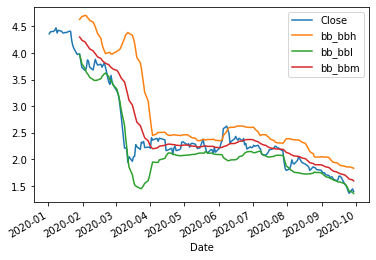

In [9]:
df.loc[:,['Close','bb_bbh','bb_bbl','bb_bbm']].plot()

In [ ]:
df.to_

In [7]:
indicator_RSI=ta.momentum.RSIIndicator(close=df['Close'],fillna=True)
df['RSI']=indicator_RSI.rsi()

<AxesSubplot:xlabel='Date'>

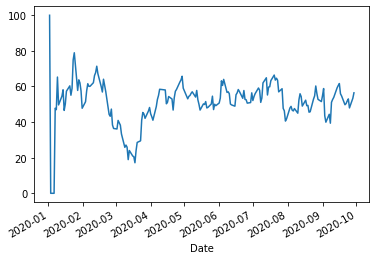

In [17]:
df['RSI'].plot()

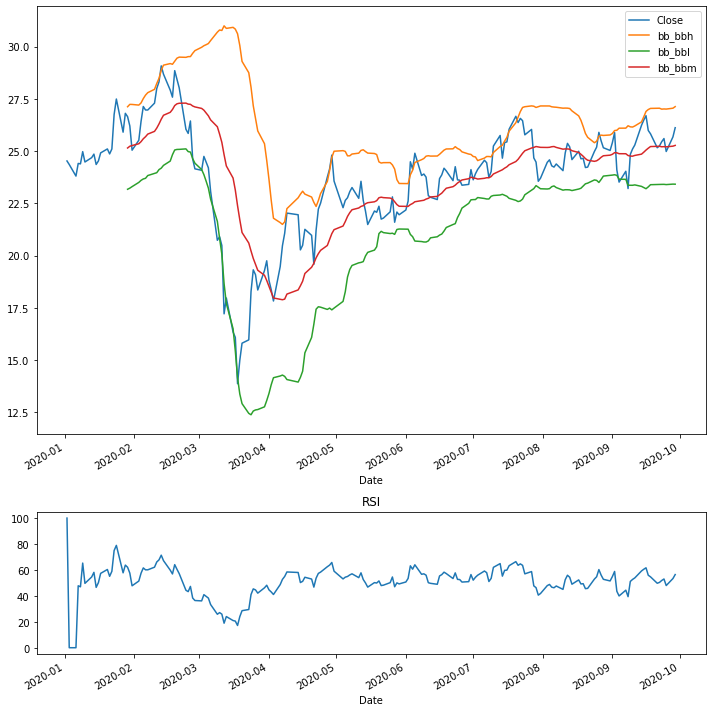

In [18]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(2,1,figsize=(10,10),gridspec_kw={'height_ratios': [3, 1]})
df.loc[:,['Close','bb_bbh','bb_bbl','bb_bbm']].plot(ax=ax[0])
#df['Close'].plot(ax=ax[0])
df['RSI'].plot(ax=ax[1])
ax[1].set_title('RSI')
fig.tight_layout()

In [19]:
df1=df.loc[:,['RSI']]
df1['RSI1']=df1['RSI'].shift(1)
df1['derivative']=df1['RSI1']-df1['RSI']
df1['up']=df1['derivative']>0

In [20]:
df1

,RSI,RSI1,derivative,up
Date,,,,
2020-01-02,100.000000,NaN,NaN,False
2020-01-03,0.000000,100.000000,100.000000,True
2020-01-06,0.000000,0.000000,0.000000,False
2020-01-07,47.783785,0.000000,-47.783785,False
2020-01-08,46.991017,47.783785,0.792768,True
...,...,...,...,...
2020-09-23,51.877208,50.385837,-1.491372,False
2020-09-24,53.017875,51.877208,-1.140667,False
2020-09-25,47.957854,53.017875,5.060021,True


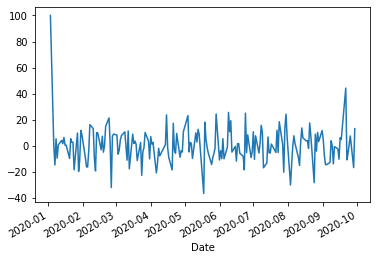

In [46]:
df1['derivative'].plot()

In [80]:
import numpy as np
x=df1['RSI']
x=np.array(x)

In [81]:
import scipy
peaks=scipy.signal.find_peaks(x)
index=peaks[0]
x[~peaks[0]]

array([56.18962628, 51.26957979, 81.93688774, 58.87640026, 22.41397291,
       57.21766584, 52.06825068, 65.68434301, 82.05004745, 66.62322971,
       66.58596208, 72.39407573, 68.5367676 , 34.01732501, 56.40728332,
       64.18583427, 51.64004486, 36.64475347, 61.61064018, 81.44531101,
       56.70609399, 72.76106146, 65.35349913, 51.17767511, 82.89984635,
       65.4445038 , 54.96270607, 68.12636423, 33.96580477, 44.85543002,
       38.38977084, 47.05848658, 11.89829929, 25.98765288, 19.6004334 ,
        8.78819994, 31.54645986, 13.70601964, 51.15664892, 50.67022522,
       70.23926954, 49.80686282,  4.97261626,  6.58196576,  9.51474786,
        0.        ])

In [82]:
x[index] = 1
x[~index]=0
x

array([100.        ,   0.        ,   0.        ,   1.        ,
         0.        ,   1.        ,  18.51756597,  14.45217234,
        12.93129576,   0.        ,   6.23412635,   5.8478239 ,
         1.        ,  10.29182277,   7.58666977,   0.        ,
         1.        ,  13.7920134 ,  33.58405693,   1.        ,
        32.50485769,  24.40695126,  33.59740646,   0.        ,
        66.19143232,   0.        ,  54.05846863,  40.95481282,
         0.        ,   1.        ,  60.00250251,  50.31339445,
         1.        ,  46.16928661,   0.        ,  51.15664892,
        36.27706897,  14.91086609,   0.        ,   1.        ,
        38.58218734,  29.62904488,  21.46895194,  27.99246882,
         0.        ,  27.18569899,  19.43572427,   0.        ,
         8.50277721,   0.        ,   8.25828821,   0.        ,
        17.08561455,  15.46069282,   0.        ,  10.63681025,
         1.        ,  19.63928505,  42.43370745,   0.        ,
         1.        ,   0.        ,  34.70179958,   0.  

In [71]:
sub_array = x[ ~index]

In [72]:
sub_array

array([56.18962628, 51.26957979, 81.93688774, 58.87640026, 22.41397291,
       57.21766584, 52.06825068, 65.68434301, 82.05004745, 66.62322971,
       66.58596208, 72.39407573, 68.5367676 , 34.01732501, 56.40728332,
       64.18583427, 51.64004486, 36.64475347, 61.61064018, 81.44531101,
       56.70609399, 72.76106146, 65.35349913, 51.17767511, 82.89984635,
       65.4445038 , 54.96270607, 68.12636423, 33.96580477, 44.85543002,
       38.38977084, 47.05848658, 11.89829929, 25.98765288, 19.6004334 ,
        8.78819994, 31.54645986, 13.70601964, 51.15664892, 50.67022522,
       70.23926954, 49.80686282,  4.97261626,  6.58196576,  9.51474786,
        0.        ])

In [70]:
x

array([100.        ,   0.        ,   0.        ,  14.79289941,
         9.51474786,  19.13265306,  18.51756597,  14.45217234,
        12.93129576,   6.58196576,   6.23412635,   5.8478239 ,
        15.64829597,  10.29182277,   7.58666977,   4.97261626,
        23.5049175 ,  13.7920134 ,  33.58405693,  44.2501546 ,
        32.50485769,  24.40695126,  33.59740646,  49.80686282,
        66.19143232,  70.23926954,  54.05846863,  40.95481282,
        50.67022522,  70.07914198,  60.00250251,  50.31339445,
        53.44569239,  46.16928661,  51.15664892,  51.15664892,
        36.27706897,  14.91086609,  13.70601964,  45.84282583,
        38.58218734,  29.62904488,  21.46895194,  27.99246882,
        31.54645986,  27.18569899,  19.43572427,   8.78819994,
         8.50277721,  19.6004334 ,   8.25828821,  25.98765288,
        17.08561455,  15.46069282,  11.89829929,  10.63681025,
        22.07113728,  19.63928505,  42.43370745,  47.05848658,
        48.57731454,  38.38977084,  34.70179958,  44.85